<a href="https://colab.research.google.com/github/Nishithmannuru/Nishith_INFO5731_Spring2022/blob/main/INFO5731_Assignment_Four_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 999

C:\Users\nishi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv("Assignment4.csv")
df.head()

,document_id,clean_text,sentiment
0,1,ukraine stand white supremacy russia stand,Neutral
1,2,remember racism black people problem way white...,Negative
2,3,born slavery tubman escaped made mission rescu...,Positive
3,4,kill body take life never kill soul soul live ...,Positive
4,5,america need label kkk proud boy neo nazi hate...,Neutral


In [ ]:
data = df.iloc[:, 1]
data.head()

0           ukraine stand white supremacy russia stand
1    remember racism black people problem way white...
2    born slavery tubman escaped made mission rescu...
3    kill body take life never kill soul soul live ...
4    america need label kkk proud boy neo nazi hate...
Name: clean_text, dtype: object

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Converting sentences to words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

C:\Users\nishi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 1

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['ukraine', 'stand', 'white', 'supremacy', 'russia', 'stand']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\Users\nishi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['ukraine', 'stand', 'white', 'supremacy', 'stand']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1)]]


C:\Users\nishi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Or, you can see a human-readable form of the corpus itself.
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

C:\Users\nishi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('stand', 2), ('supremacy', 1), ('ukraine', 1), ('white', 1)]]

## 2

**Building an LDA model**

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\nishi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.107*"amp" + 0.045*"time" + 0.028*"let" + 0.025*"killer" + 0.021*"give" + '
  '0.019*"video" + 0.019*"enough" + 0.019*"try" + 0.017*"thank" + '
  '0.017*"fight"'),
 (1,
  '0.103*"black" + 0.090*"people" + 0.074*"incompetent" + 0.072*"go" + '
  '0.045*"spirituality" + 0.040*"reparation" + 0.036*"century_demand" + '
  '0.036*"repair_damage" + 0.036*"country_inflicte" + 0.033*"never"'),
 (2,
  '0.028*"work" + 0.027*"learn" + 0.026*"help" + 0.023*"share" + 0.022*"well" '
  '+ 0.017*"ever" + 0.015*"racial" + 0.014*"voice" + 0.014*"tell" + '
  '0.014*"child"'),
 (3,
  '0.060*"man" + 0.059*"get" + 0.047*"police" + 0.042*"racist" + 0.029*"shoot" '
  '+ 0.024*"watch" + 0.017*"still" + 0.015*"trial" + 0.014*"power" + '
  '0.013*"month"'),
 (4,
  '0.036*"crime" + 0.030*"right" + 0.029*"white" + 0.026*"charge" + '
  '0.024*"black" + 0.023*"know" + 0.018*"kill" + 0.015*"want" + '
  '0.015*"movement" + 0.014*"use"'),
 (5,
  '0.039*"need" + 0.036*"family" + 0.033*"guilty" + 0.025*"day" + '
 

C:\Users\nishi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3

TOPIC 1: Regarding the videos showing the struggle that the victim was going through. 
TOPIC 2: About black people and their supremacy. 
TOPIC 3: Working and learning together to stop racial injustice.
TOPIC 4: Regarding the polices being racists.
TOPIC 5: Regarding the racial crimes.
TOPIC 6: Regarding the pain and guilt felt by the families.
TOPIC 7: Regarding the black lives matter movement.
TOPIC 8: Regarding love, peace and support.
TOPIC 9: Regarding racial injustice.
TOPIC 10: Regarding justic for who were targeted for hate crime.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here

## 1.

I used the TF-IDF vectorizer to extract features from my data corpus because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words, which I believe adds additional weightage while understanding the different classes and thus increasing the accuracy of our model.

## 2.

In [ ]:
data = pd.read_csv("Assignment4.csv")
data.head()

,document_id,clean_text,sentiment
0,1,ukraine stand white supremacy russia stand,Neutral
1,2,remember racism black people problem way white...,Negative
2,3,born slavery tubman escaped made mission rescu...,Positive
3,4,kill body take life never kill soul soul live ...,Positive
4,5,america need label kkk proud boy neo nazi hate...,Neutral


## Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["sentiment"] = le.fit_transform(data["sentiment"])

data.head()

,document_id,clean_text,sentiment
0,1,ukraine stand white supremacy russia stand,1
1,2,remember racism black people problem way white...,0
2,3,born slavery tubman escaped made mission rescu...,2
3,4,kill body take life never kill soul soul live ...,2
4,5,america need label kkk proud boy neo nazi hate...,1


## Tf-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(data['clean_text'].apply(lambda x: np.str_(x)))
y = data['sentiment']

## Data Partitioning

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 202)

print ("x_train", x_train.shape)
print ("x_test", x_test.shape)
print ("y_train", y_train.shape)
print ("y_test", y_test.shape)

x_train (1840, 5015)
x_test (460, 5015)
y_train (1840,)
y_test (460,)


## 1. MultinominalNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train,y_train)
predictions_nb = nb.predict(x_test)
predictions_nb

array([1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2,
       2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1,
       0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2,
       1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 0, 1,
       0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1,
       1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2,
       2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2,

In [ ]:
from sklearn.metrics import classification_report

cr_naive = classification_report(y_test, predictions_nb)
print("Classification Report: ", "\n", "\n",cr_naive)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       150
           1       0.75      0.63      0.68       161
           2       0.69      0.74      0.71       149

    accuracy                           0.71       460
   macro avg       0.72      0.72      0.71       460
weighted avg       0.72      0.71      0.71       460



## 10-Fold Cross Validation of the Naive Bayes Model

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_nb = cross_val_score(estimator = nb, X = x_train, y = y_train, cv = 10)

print(f"Accuracy of the Naive Bayes Model is :  {round(accuracies_nb.mean()*100)}%")

Accuracy of the Naive Bayes Model is :  72%


## 2. SVM

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
predictions_svm = clf.predict(x_test)
predictions_svm

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1,
       0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 2,
       1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 1,
       0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 1, 0,
       2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1,
       1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1, 2,
       2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 2,
       2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1,

In [ ]:
cr_svm = classification_report(y_test, predictions_svm)
print("Classification Report: ", "\n", "\n",cr_svm)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       150
           1       0.68      0.88      0.77       161
           2       0.79      0.69      0.74       149

    accuracy                           0.76       460
   macro avg       0.78      0.76      0.76       460
weighted avg       0.78      0.76      0.76       460



## 10-Fold Cross Validation of the SVM Model

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_svm = cross_val_score(estimator = clf, X = x_train, y = y_train, cv = 10)

print(f"Accuracy of the SVM Model is :  {round(accuracies_svm.mean()*100)}%")

Accuracy of the SVM Model is :  79%


## 3.

## Conclusion

The accuracy of the SVM model after 10-fold cross validation is 79 percent, whereas the accuracy of the Naive Bayes model is 72 percent. This means that the SVM model outperforms the naïve bayes model when it comes to categorizing tweets into distinct categories.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here

## Reading the Training set

In [ ]:
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Reading the test set

In [ ]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Shape of the training set

In [ ]:
train_data.shape

(1460, 81)

## Shape of the test set

In [ ]:
test_data.shape

(1459, 80)

## Identifying the data type of the attributes in the training set

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Identifying the data type of the attributes in the test set

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Checking for missing values training set

In [ ]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
#Dividing the data into numerical and categorical.

train_categorical_data = [var for var in train_data.columns if train_data[var].dtype=='O']
train_numerical_data = [var for var in train_data.columns if train_data[var].dtype=='float']

In [ ]:
# imputing the missing values by the attributes mean for all the numerical attributes.

for i in train_numerical_data:
    train_data[i].fillna(value = train_data[i].mean(),inplace = True)

In [ ]:
train_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## Checking for missing values testing set

In [ ]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
#Dividing the data into numerical and categorical.

test_categorical_data = [var for var in test_data.columns if test_data[var].dtype=='O']
test_numerical_data = [var for var in test_data.columns if test_data[var].dtype=='float']

In [ ]:
# imputing the missing values by the attributes mean for all the numerical attributes.

for i in test_numerical_data:
    test_data[i].fillna(value = test_data[i].mean(),inplace = True)

## EDA

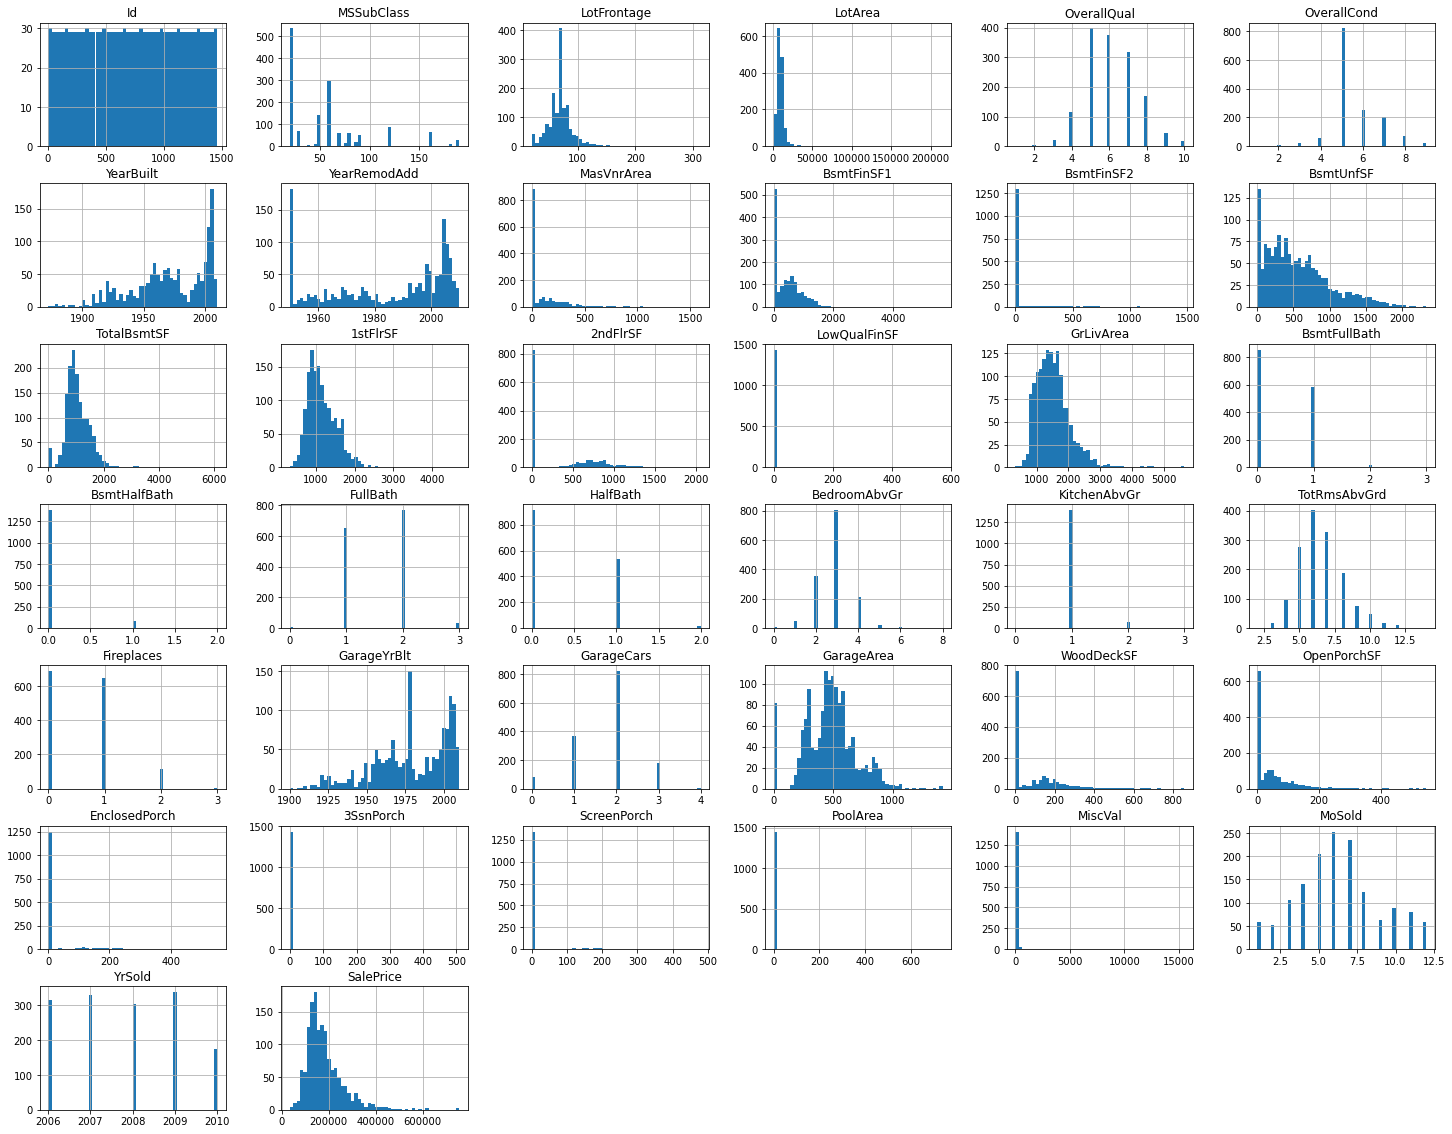

In [ ]:
train_data.hist(bins=50, figsize=(25,20))
plt.show()

array([[<AxesSubplot:xlabel='SalePrice', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>,
        <AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>],
       [<AxesSubplot:xlabel='SalePrice', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GrLivArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <AxesSubplot:xlabel='1stFlrSF', ylabel=

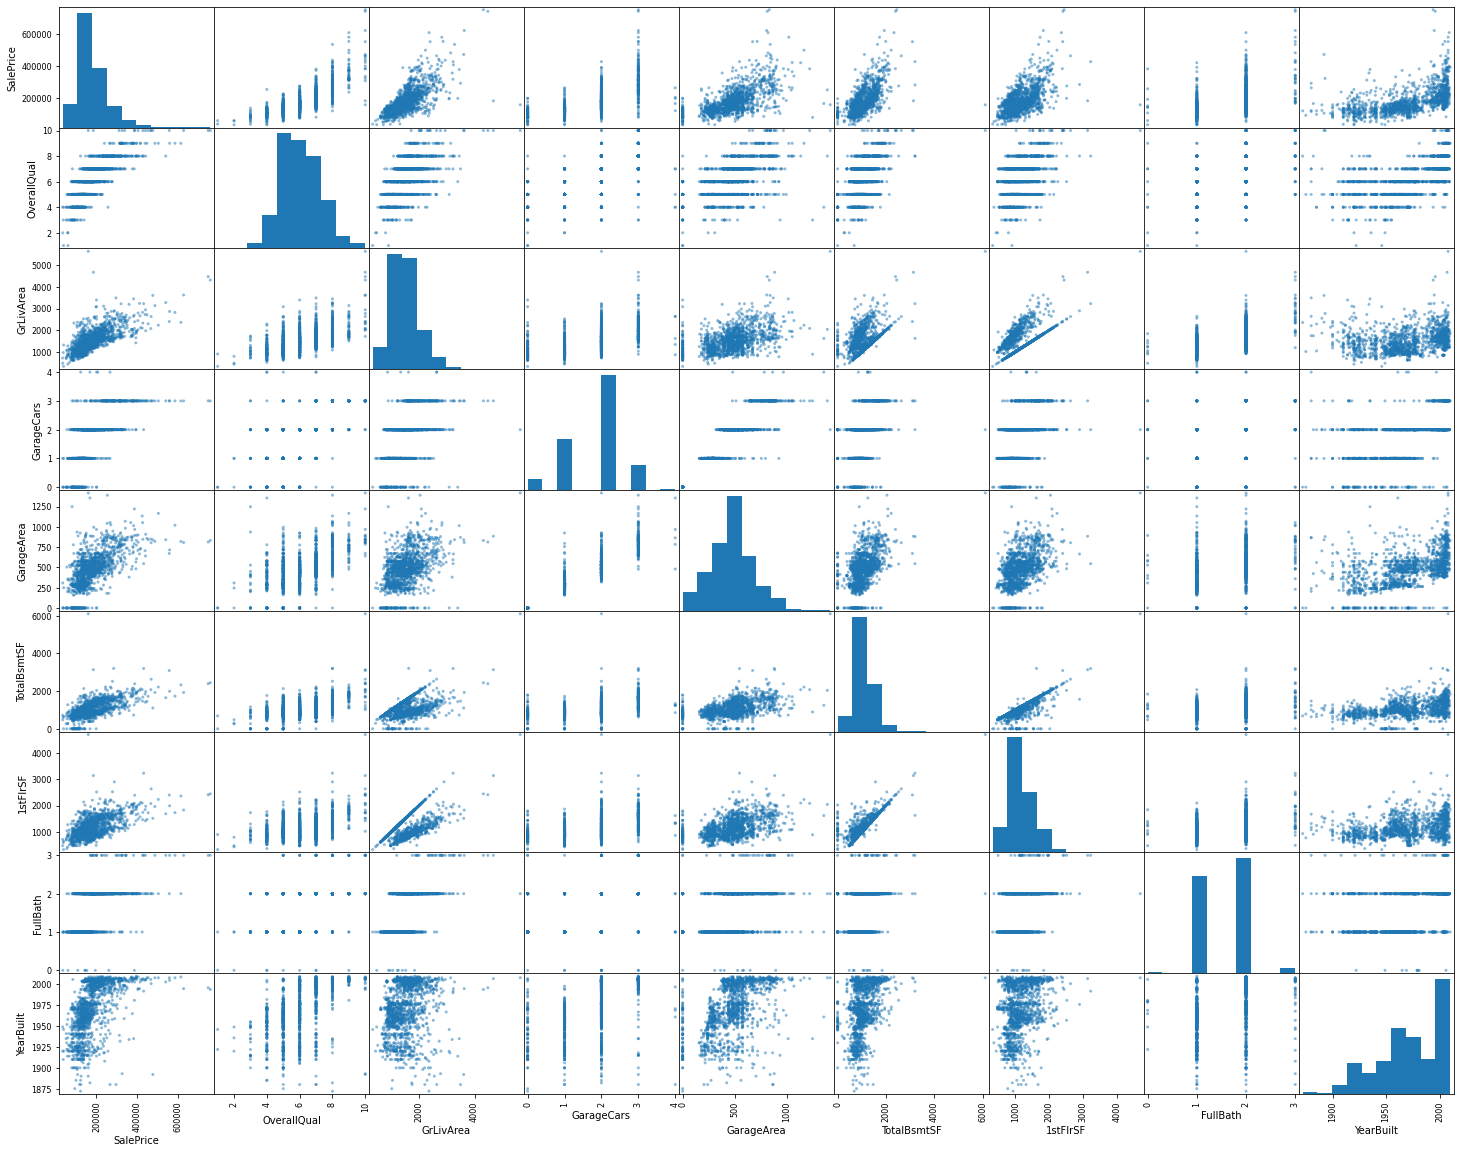

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea","TotalBsmtSF","1stFlrSF", "FullBath","YearBuilt" ]
scatter_matrix(train_data[attributes], figsize=(25, 20))

## Correlation analysis

<AxesSubplot:>

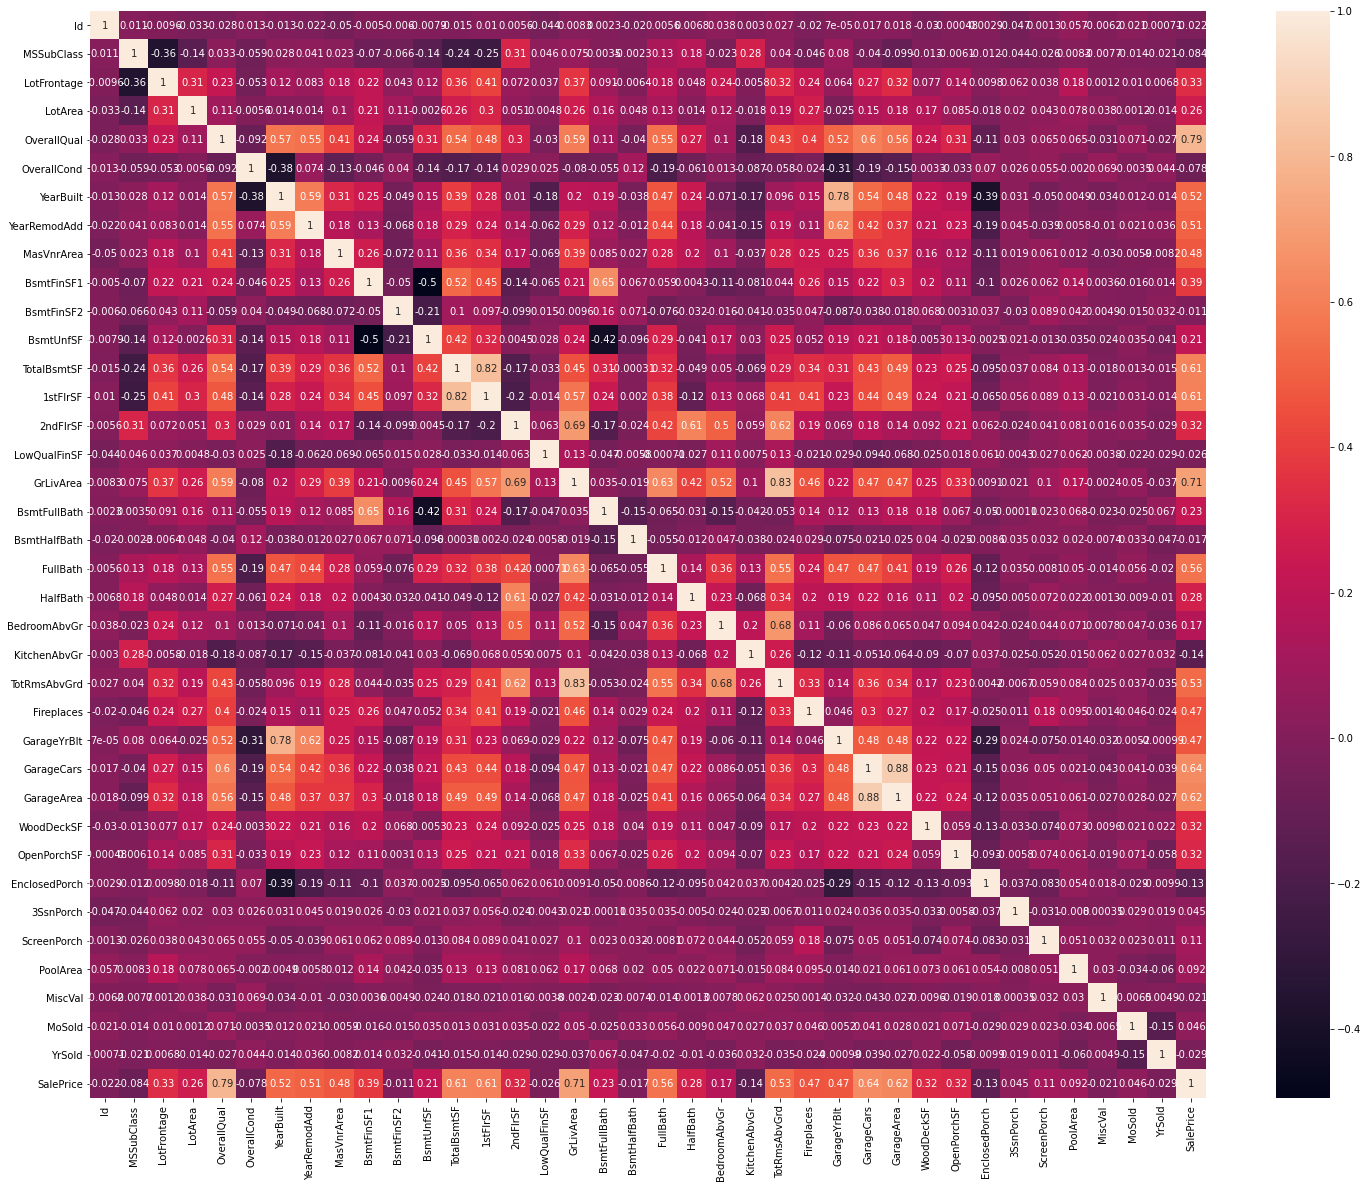

In [ ]:
plt.figure(figsize = (25,20))
sns.heatmap(train_data.corr(), annot = True)

In [ ]:
# There are a lot of correlated attributes and manually removing every hihgly correlated attributes takes time.
# Therefore, writing a code to remove the correlated attributes based on the given threshold.
# I have considered the minimum threshold to be 0.8.
# I.e., if any two attributes are correlated by more than 80%, a single attribute out of those two will be dropped.

cor_matrix = train_data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print("The attributes that needs to be dropped are:\n ",to_drop)

The attributes that needs to be dropped are:
  ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']


## Dropping the ID and the correlated attributes from the training and test set

In [ ]:
train_data.drop(columns = to_drop, axis = 1, inplace = True)
test_data.drop(columns = to_drop, axis = 1, inplace = True)
# dropping id attributes
train_data.drop(labels = ['Id'], axis = 1, inplace = True)
test_data.drop(labels = ['Id'], axis = 1, inplace = True)

## Label encoding the data in both training and testing sets

In [ ]:
from sklearn.preprocessing import LabelEncoder

for column in train_data.columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_data[column].values))
    train_data[column] = encoder.transform(list(train_data[column].values))

In [ ]:
for column in test_data.columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_data[column].values))
    test_data[column] = encoder_test.transform(list(test_data[column].values))

## Data Partitioning

In [ ]:
x_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
x_test = test_data.iloc[:,:]

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)

In [ ]:
print("R-Square value: ", lr.score(x_train,y_train))

R-Square value:  0.9174185321709603


In [ ]:
pd.DataFrame({'Predicted House Price Values': predictions_lr})

,Predicted House Price Values
0,70.343583
1,212.796788
2,304.151060
3,340.491565
4,285.537547
...,...
1454,-24.296071
1455,-58.125625
1456,249.645948
1457,78.572121
